In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0a89f7e78746b3be1cbbfc4cc933c8b55caf4abd5ff1843d709c68c4a0542fa2
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.controlsystem import Antecedent
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
from networkx.algorithms.bipartite import projection

**BT : ĐK Động Cơ DC (Nhiệt độ)**
- Input : 
    + Setpoint : 18-30
    + Val sensor : -5-60
- Output :
    + PWM : 0-255

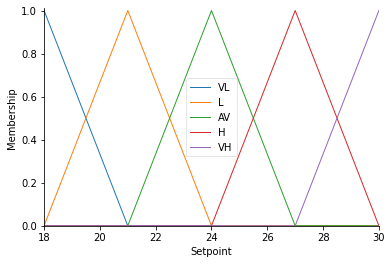

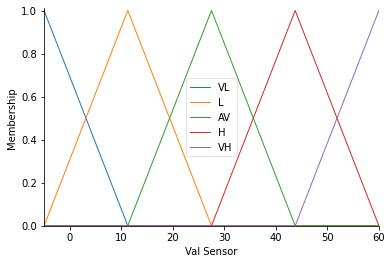

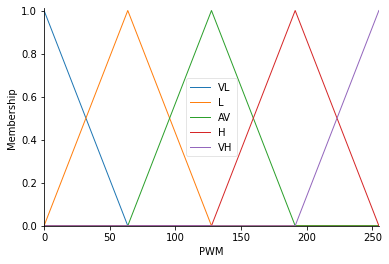

In [19]:
universe1 = np.linspace(18, 30, 61)
universe2 = np.linspace(-5, 60, 61)
universe3 = np.linspace(0, 255,61)

#input
sp    = ctrl.Antecedent(universe1, 'Setpoint')
vs   = ctrl.Antecedent(universe2, 'Val Sensor')
#output
pwm = ctrl.Consequent(universe3, 'PWM')

#membership
#name
names = ['VL','L','AV','H','VH']

#.automf
sp.automf(names = names)
vs.automf(names = names)
pwm.automf(names = names)

#view
sp.view()
vs.view()
pwm.view()

In [24]:
#rules
rule = []
rule.append(ctrl.Rule(antecedent=(sp['VL'] & vs['VL'])|(sp['VL'] & vs['L'])|(sp['VL'] & vs['AV']), consequent=pwm['VL'], label='Rule VL'))

rule.append(ctrl.Rule(antecedent=(sp['L'] & vs['VL'])|(sp['L'] & vs['L'])|(sp['L'] & vs['AV'])|
                      (sp['AV'] & vs['VL'])|(sp['H'] & vs['VL'])|(sp['VH'] & vs['VL']), consequent=pwm['L'], label='Rule L'))

rule.append(ctrl.Rule(antecedent=(sp['VL'] & vs['H'])|(sp['VL'] & vs['VH'])|(sp['L'] & vs['H'])|
                      (sp['L'] & vs['VH'])|(sp['AV'] & vs['L'])|(sp['AV'] & vs['AV'])|(sp['AV'] & vs['H'])|
                      (sp['H'] & vs['L'])|(sp['VH'] & vs['L']), consequent=pwm['AV'], label='Rule AV'))

rule.append(ctrl.Rule(antecedent=(sp['AV'] & vs['VH'])|(sp['H'] & vs['AV'])|(sp['H'] & vs['H'])|(sp['H'] & vs['VH']), consequent=pwm['H'], label='Rule H'))

rule.append(ctrl.Rule(antecedent=(sp['VH'] & vs['AV'])|(sp['VH'] & vs['H'])|(sp['VH'] & vs['VH']), consequent=pwm['VH'], label='Rule VH'))

127.50000000000001


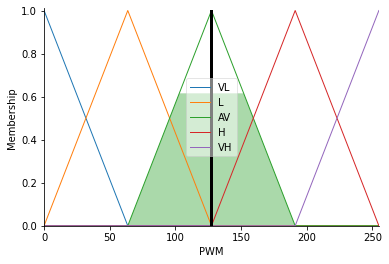

In [25]:
#control
pwm_system = ctrl.ControlSystem(rule)
pwm_simulation = ctrl.ControlSystemSimulation(pwm_system,flush_after_run = 61*61+1)

pwm_simulation.input['Setpoint'] = 20
pwm_simulation.input['Val Sensor'] = 50
pwm_simulation.compute()
print(pwm_simulation.output['PWM'])
pwm.view(sim=pwm_simulation)

In [26]:
upsampled1 = np.linspace(18,30, 61)
upsampled2 = np.linspace(-5,60, 61)

x,y = np.meshgrid(upsampled1, upsampled2)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    pwm_simulation.input['Setpoint'] = x[i,j]
    pwm_simulation.input['Val Sensor'] = y[i,j]
    pwm_simulation.compute()
    z[i,j] = pwm_simulation.output['PWM']

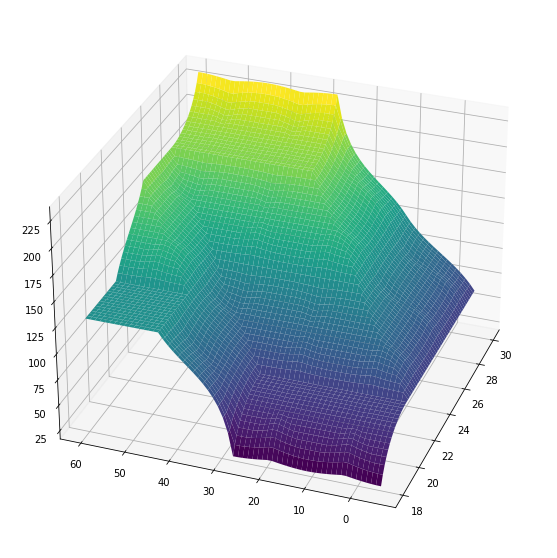

In [32]:
#Xuất đồ thị
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.5, antialiased = True)
ax.view_init(30,200)